## <span style="color : green"> Self Organising Map </span>

# <center> Table of Contents </center>

1. Train a SOM Model and Display the weights and labels
1. Plot the predicted cluster
1. Evalute the clustering approach using partition coefficient, silhoutter score and partition entropy coefficient 

### **Implementation of Self Organizing Map**

A self-organizing map or self-organizing feature map is an unsupervised machine learning technique used to produce a low-dimensional representation of a higher dimensional data set while preserving the topological structure of the data.

In [ ]:
pip install MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#1 Load the given dataset
df=pd.read_csv('Heart.csv')
y=df.Thal
df.head()

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal


In [ ]:
#2 Conduct the pre-processing steps
df.dropna(inplace=True)
df.isnull().sum()

RestBP     0
Chol       0
Fbs        0
RestECG    0
MaxHR      0
ExAng      0
Oldpeak    0
Slope      0
Ca         0
Thal       0
dtype: int64

In [ ]:
#3 Remove the target variable
df.drop(['Thal'],axis=1,inplace=True)
df

,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
0,145,233,1,2,150,0,2.3,3,0
1,160,286,0,2,108,1,1.5,2,3
2,120,229,0,2,129,1,2.6,2,2
3,130,250,0,0,187,0,3.5,3,0
4,130,204,0,2,172,0,1.4,1,0
...,...,...,...,...,...,...,...,...,...
298,110,264,0,0,132,0,1.2,2,0
299,144,193,1,0,141,0,3.4,2,2
300,130,131,0,0,115,1,1.2,2,1
301,130,236,0,2,174,0,0.0,2,1


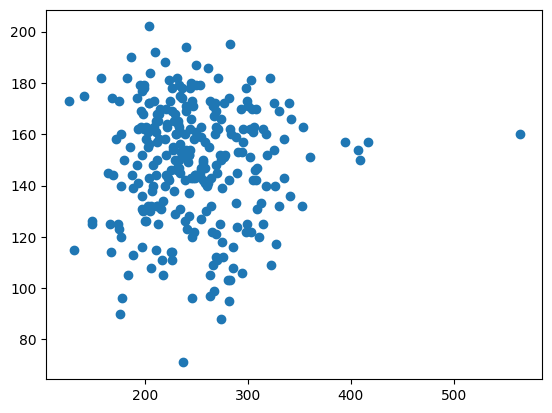

In [ ]:
#4 Plot the datapoints using scatter plots.
plt.scatter(df['Chol'],df['MaxHR'])

In [ ]:
def som_ini(ipt1,ipt2):
  data=df.values
  som_shape = (ipt1, ipt2)

  som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=0.5, learning_rate=0.5)

  max_iter = 1000
  q_error = []
  t_error = []

  for i in range(max_iter):
      rand_i = np.random.randint(len(data))
      som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
      q_error.append(som.quantization_error(data))
      t_error.append(som.topographic_error(data))

  plt.plot(np.arange(max_iter), q_error, label='quantization error')
  plt.plot(np.arange(max_iter), t_error, label='topographic error')
  plt.ylabel('Quantization error')
  plt.xlabel('Iteration index')
  plt.legend()
  plt.show()

  winner_coordinates = np.array([som.winner(x) for x in data]).T
  cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
  plt.figure(figsize=(10,8))
  for c in np.unique(cluster_index):
      plt.scatter(data[cluster_index == c, 0],
                  data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)
  for centroid in som.get_weights():
      plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                  s=10, linewidths=20, color='k')
  plt.legend();

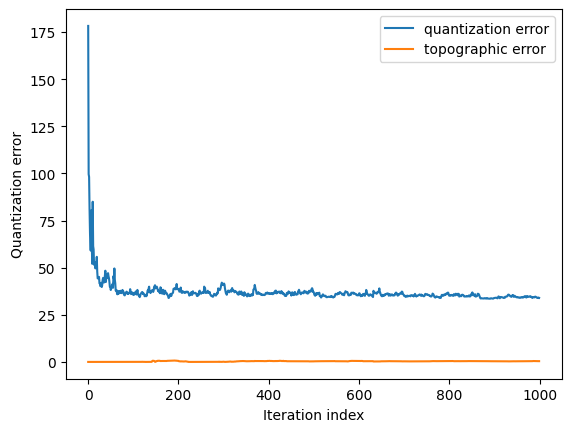

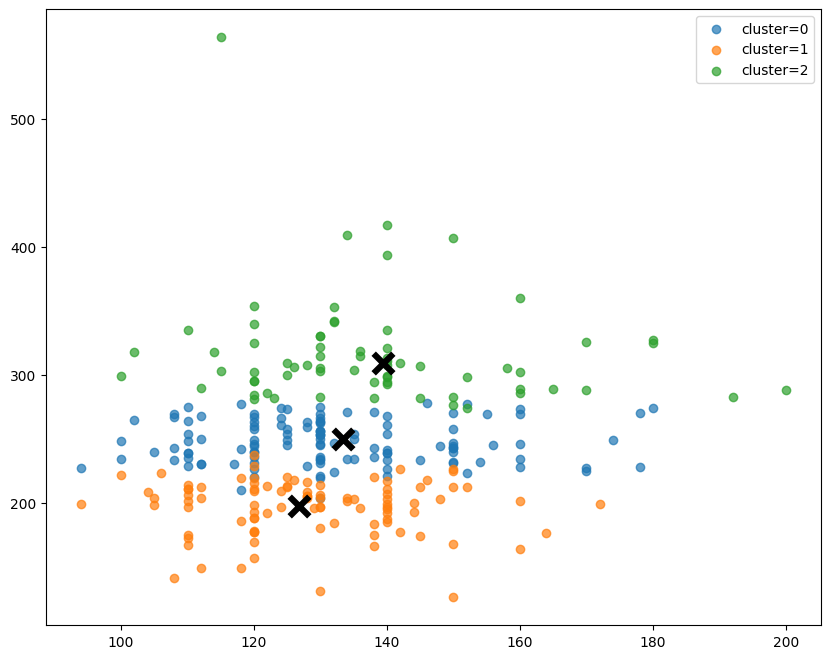

In [ ]:
som_ini(1,3)


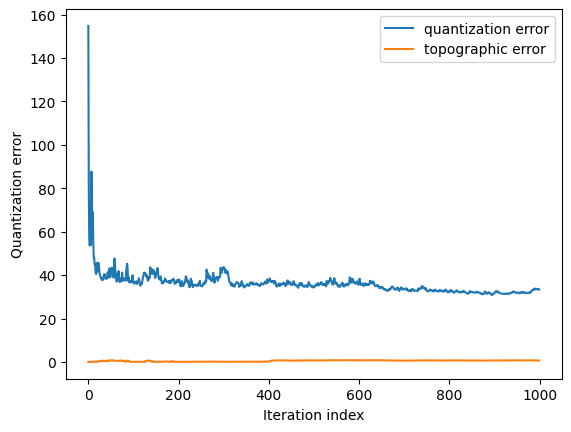

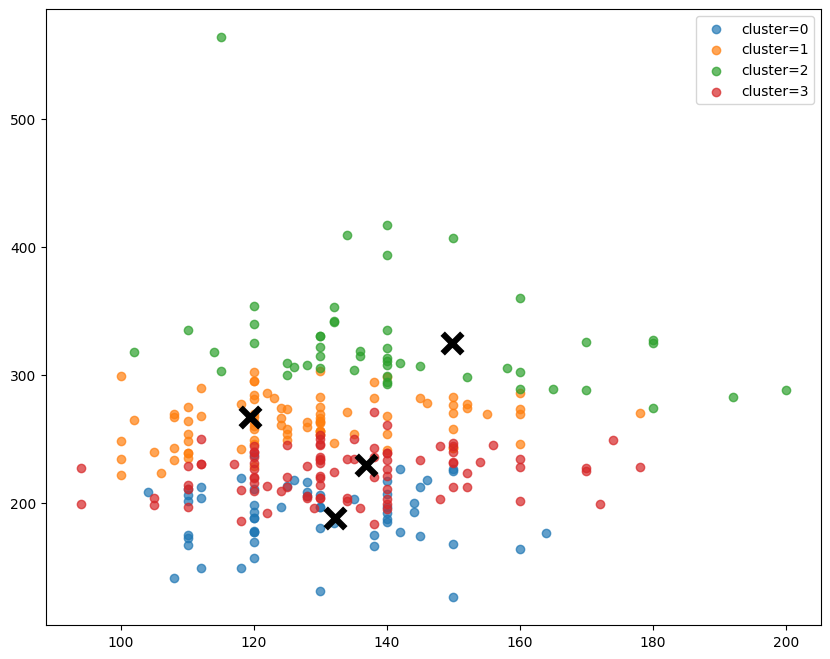

In [ ]:
#6 Print and plot the cluster centroids and cluster labels
som_ini(1,4)

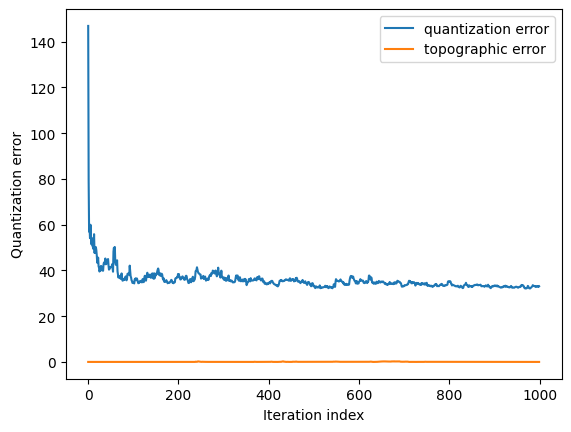

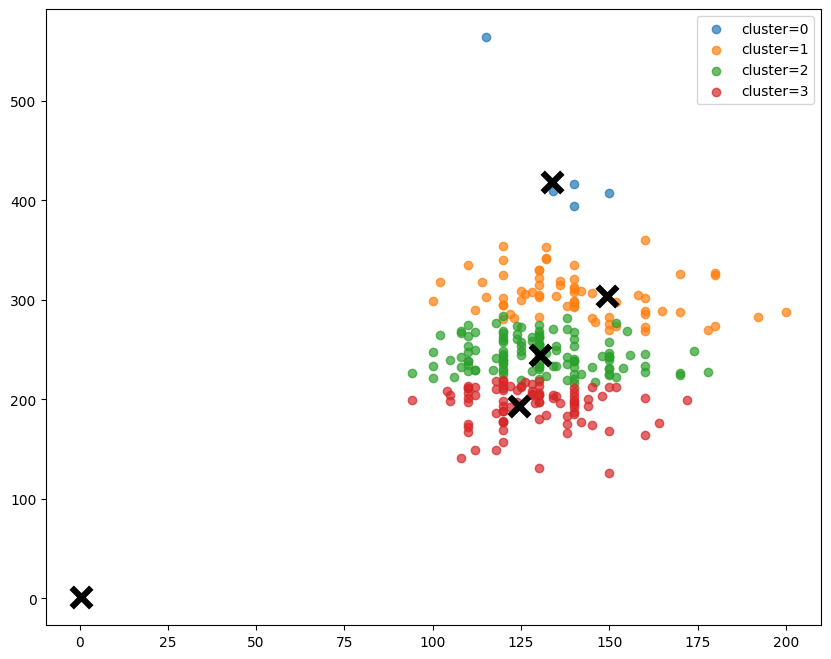

In [ ]:
#6
som_ini(1,5)

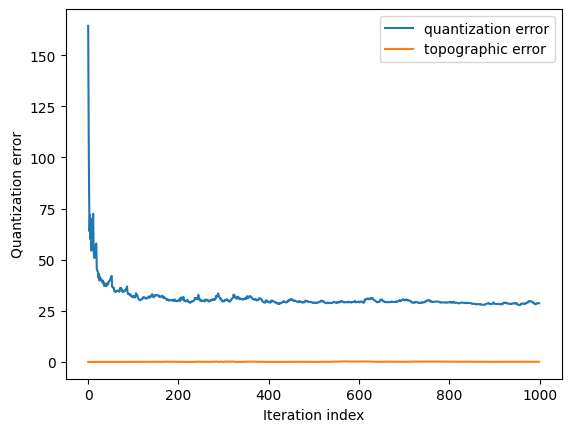

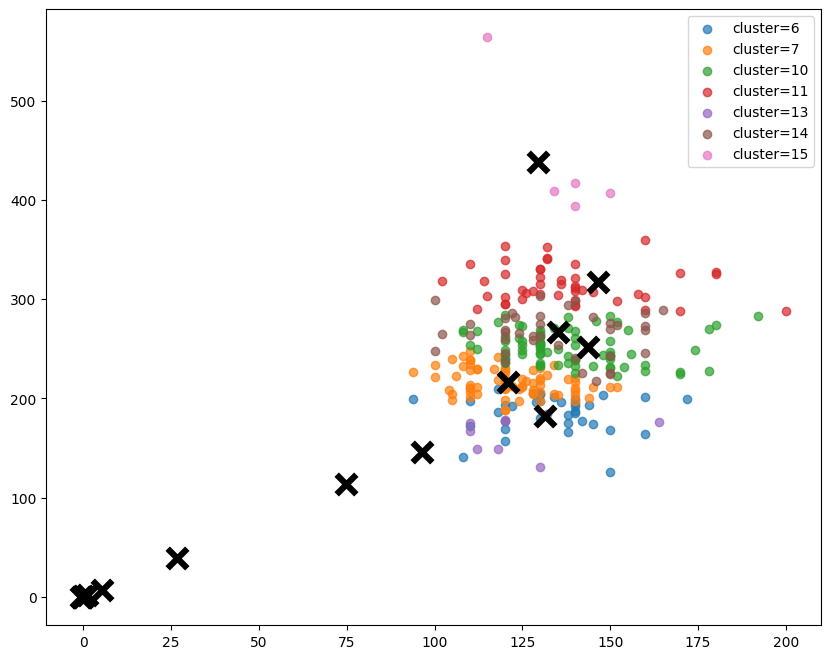

In [ ]:
som_ini(4,4)